# Linear Regression Example
Portions from prev lectures, github, and kaggle


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# SET THE PROPER PATH FOR YOUR FILES!
# if we can import the drive module, we are running on colab
try:
    from google.colab import drive #give colab access to google drive...
    from google.colab import auth
    auth.authenticate_user()
    drive.mount('/content/drive')
    thePath = '/content/drive/My Drive/DSE200_Data/'
except:
    thePath = './'


theFile = 'SalesAds.csv'
df= pd.read_csv(thePath + theFile)
print(f"shape {df.shape}")

#show some data
print(df.head())
print()

#let's take a closer look...
print(df.info())
print(df.describe())

shape (36, 2)
   Sales  Ads
0   12.0   15
1   20.5   16
2   21.0   18
3   15.5   27
4   15.3   21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
 1   Ads     36 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 708.0 bytes
None
           Sales        Ads
count  36.000000  36.000000
mean   24.255556  28.527778
std     6.185118  18.777625
min    12.000000   1.000000
25%    20.300000  15.750000
50%    24.250000  23.000000
75%    28.600000  41.000000
max    36.500000  65.000000


## Linear Regression
Linear Regression is a statistical technique that is used to find the linear relationship between a dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ the Simple Linear Regression technique, where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.



Simple Linear Regression (SLR)
Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables.

In this project, there is one independent or input variable that represents the Sales data and is denoted by X. Similarly, there is one dependent or output variable that represents the Advertising data and is denoted by y. We want to build a linear relationship between these variables. This linear relationship can be modeled by a mathematical equation of the form:

Y = β0   + β1*X    -------------   (1)
In this equation, X and Y are called independent and dependent variables, respectively, β1 is the coefficient for the independent variable, and β0 is the constant term. β0 and β1 are called parameters of the model.

For simplicity, we can compare the above equation with the basic line equation of the form:-

```y = ax + b```       ----------------- (2)
We can see that the slope of the line is given by a = β1, and the intercept of the line by b = β0.

In this Simple Linear Regression model, we want to fit a line that estimates the linear relationship between X and Y. So, the question of fitting reduces to estimating the parameters of the model β0 and β1.



## Ordinary Least Square Method
As I have described earlier, the Sales and Advertising data are given by X and y, respectively. We can draw a scatter plot between X and y which shows the relationship between them. Now, our task is to find a line that best fits this scatter plot. This line will help us to predict the value of any Target variable for any given Feature variable. This line is called the Regression line. We can define an error function for any line. Then, the regression line is the one that minimizes the error function. Such an error function is also called a Cost function.



##Cost Function
We want the Regression line to resemble the dataset as closely as possible. In other words, we want the line to be as close to actual data points as possible. It can be achieved by minimizing the vertical distance between the actual data point and the fitted line. I calculate the vertical distance between each data point and the line. This distance is called the residual.

So, in a regression model, we try to minimize the residuals by finding the line of best fit. The residuals are represented by the vertical dotted lines from actual data points to the line. We can try to minimize the sum of the residuals, but then a large positive residual would cancel out a large negative residual. For this reason, we minimize the sum of the squares of the residuals.

Mathematically, we denote actual data points by yi and predicted data points by ŷi. So, the residual for a data point i would be given as

di = yi -  ŷi
The sum of the squares of the residuals is given as:

 D = Ʃ di**2       for all data points
This is the Cost function. It denotes the total error present in the model, which is the sum of the total errors of each individual data point.

We can estimate the parameters of the model β0 and β1 by minimizing the error in the model by minimizing D. Thus, we can find the regression line given by equation (1). This method of finding the parameters of the model and thus regression line is called the Ordinary Least Square Method.

## Independent and Dependent Variables
In this project, I refer to the independent variable as the Feature variable and the dependent variable as the Target variable. These variables are also recognized by different names, as follows:



## Independent variable
The independent variable is also called the Input variable and is denoted by X. In practical applications, the independent variable is also called the Feature variable or Predictor variable. We can denote it as:

Independent or Input variable (X) = Feature variable = Predictor variable



## Dependent variable
The dependent variable is also called the Output variable and is denoted by y.

The dependent variable is also called the Target variable or the Response variable. It can be denoted as follows:

Dependent or Output variable (y) = Target variable = Response variable



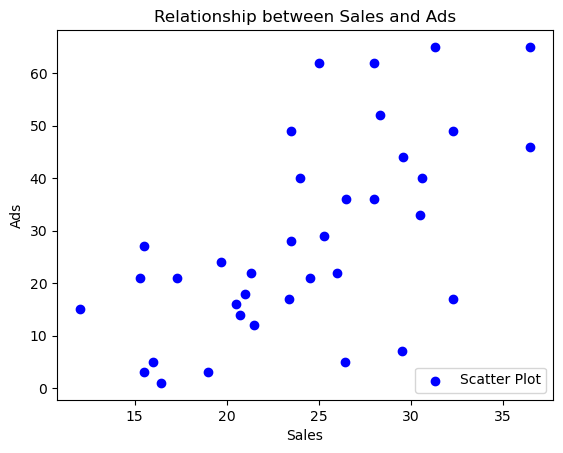

In [2]:


# Declare feature variable and target variable

X = df['Sales'].values
y = df['Ads'].values

# Sales and Advertising data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

# Plot scatter plot between X and y

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Ads')
plt.xlabel('Sales')
plt.ylabel('Ads')
plt.legend(loc=4)
plt.show()

## Checking dimensions of X and y
We need to check the dimensions of X and y to make sure they are in the right format for Scikit-Learn API. It is an important precursor to model building.

In [3]:
# Print the dimensions of X and y

print(X.shape)
print(y.shape)
(36,)
(36,)

(36,)
(36,)


(36,)

## Reshaping X and y
Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method. It specifies the first dimension to be -1, which means "unspecified". Its value is inferred from the length of the array and the remaining dimensions.

In [4]:
# Reshape X and y

X = X.reshape(-1,1)
y = y.reshape(-1,1)
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)
(36, 1)
(36, 1)

(36, 1)
(36, 1)


(36, 1)

## The difference in dimensions of X and y after reshaping
We can see the difference in dimensions of X and y before and after reshaping. It is essential in this case because getting the feature and target variable right is an important precursor to model building.


## Train test split
I split the dataset into two sets, namely - the train set and the test set. The model learns the relationships from the training data and predicts them on test data.

In [5]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
(24, 1)
(24, 1)
(12, 1)
(12, 1)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


(12, 1)

#Mechanics of the model
Let's split the dataset into two sets – the training set and the test set. Then, instantiate the regressor lm and fit it on the training set with the fit method. In this step, the model learned the relationships between the training data (X_train, y_train). Now, the model is ready to make predictions on the test data (X_test). Hence, we predict the test data using the predict method.

In [6]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)

# Model slope and intercept term
The model slope is given by lm.coef and the model intercept term is given by lm.intercept. The estimated model slope and intercept values are 1.60509347 and -11.16003616. So, the equation of the fitted regression line is:

```y = 1.60509347 * x - 11.16003616```

In [7]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_,
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

# So, our fitted regression line is

# y = 1.60509347 * x - 11.16003616

# That is our linear model.

# y = 1.60509347 * x - 11.16003616

# That is our linear model.

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: [-11.16003616]


# Making predictions
We predicted the Ad values on the first five Sales datasets by writing code

In [8]:
lm.predict(X) [0:5]

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

where Xi is the Sales data value of the ith observation.


In [9]:
import numpy as np # Import the numpy library

# Predicting Advertising values

lm.predict(X)[0:5]

# Predicting Advertising values on first five Sales values.
np.array([[ 8.10108551], # Use np.array to create the array
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])
# To make an individual prediction using the linear regression model.

# Reshape the input to a 2D array with shape (1, 1)
print(str(lm.predict(np.array([[24]]))))
# [[27.36220717]] # Expected output

[[27.36220717]]


#Regression metrics for model performance
Now, it is time to evaluate model performance. For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared Value. These are explained below:



#RMSE
RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking the square root of the Mean Squared Error. RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence the lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate a better fit of data.

In [10]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))
# RMSE value: 11.2273

RMSE value: 11.2273


## R2 Score
R2 Score is another metric to evaluate the performance of a regression model. It is also called the coefficient of determination. It gives us an idea of the goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model. Mathematically:

R2 Score = Explained Variation/Total Variation

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

In [11]:
# Calculate and print r2_score

# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))
#R2 Score value: 0.5789

R2 Score value: 0.5789


## Interpretation and Conclusion
The RMSE value has been found to be 11.2273. It means the standard deviation for our prediction is 11.2273. So, sometimes we expect the predictions to be off by more than 11.2273, and other times, we expect less than 11.2273. So, the model is not a good fit for the data.

In business decisions, the benchmark for the R2 score value is 0.7. It means if the R2 score value >= 0.7, then the model is good enough to deploy on unseen data, whereas if the R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .5789. It means that this model explains 57.89 % of the variance in our dependent variable. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide a good fit for the data.

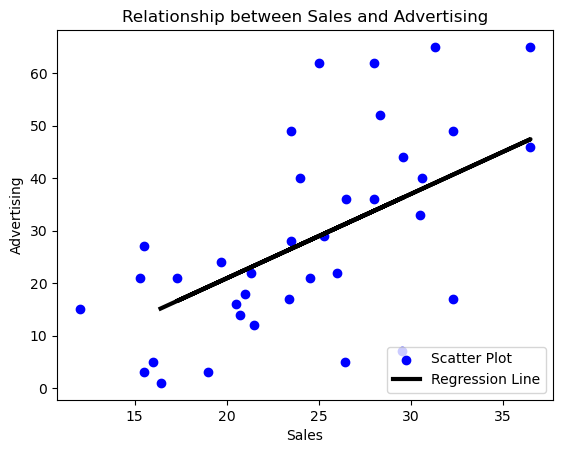

In [12]:
# Plot the Regression Line

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

## Residual analysis
A linear regression model may not represent the data appropriately. The model may be a poor fit for the data. So, we should validate our model by defining and examining residual plots. The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter plot of these residuals is called the residual plot. If the data points in a residual plot are randomly dispersed around the horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise, a non-linear model may be more appropriate. If we take a look at the generated 'Residual errors' plot, we can clearly see that the train data plot pattern is non-random. The same is the case with the test data plot pattern. So, it suggests a better fit for a non-linear model.

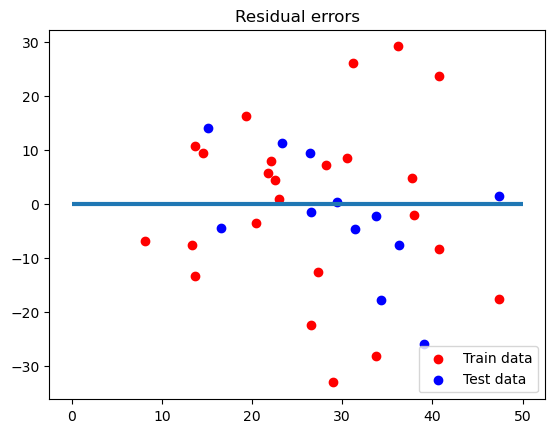

In [13]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

## Checking for Overfitting and Underfitting
We calculate the training set score as 0.2861. Similarly, we calculate the test set score as 0.5789. The training set score is very poor. So, the model does not learn the relationships appropriately from the training data.

Since the model performs poorly on the training data, it is a  sign of "underfitting". Underfitting means our model performs poorly on the training data. It means the model does not capture the relationships between the training data. This problem can be improved by increasing model complexity. We should use more powerful models like Polynomial regression to increase model complexity.

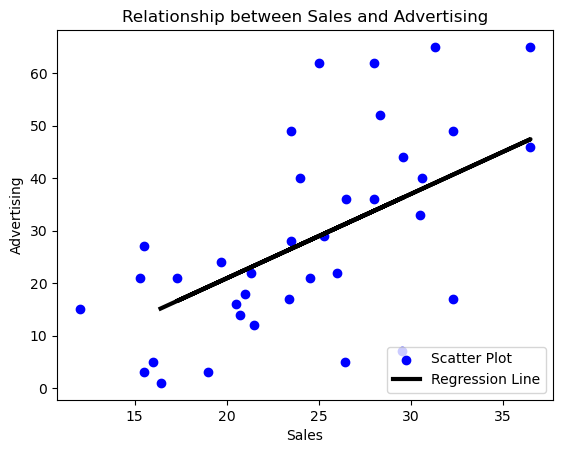

In [14]:
# Plot the Regression Line

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()